# Dataset and Question
---
Dataset: https://www.kaggle.com/benroshan/online-food-delivery-preferencesbangalore-region

With so many restaurants in Singapore, having the edge to attract more customers is lucrative.  
One way a restaurant can naturally attract more customers is through **reviews** from the customers.  
The plethora of online food delivery services act as a review bank for the many restaurants, hence, a good place to start exploring.  
We want to find out, if we were ever to setup our own restaurant with our own online delivery service, what would make customers come back and order again.  

>**What are the optimal factors for a restaurant to attract consumers via food delivery service?**

Our dataset is set in a metropolitan city in India, Bangalore.  
Due to the recent (2021) rise in demand of online delivery there, this dataset was gathered.

# Essential Libraries
---
    > NumPy : Library for Numeric Computations in Python
    > Pandas : Library for Data Acquisition and Preparation
    > Matplotlib : Low-level library for Data Visualization
    > Seaborn : Higher-level library for Data Visualization
    > Scikit Learn : Regressions and Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb

In [3]:
foodDelivery = pd.read_csv("onlinedeliverydata.csv")

# EDA
--------

## Dataset Analysis
---

There are a lot of Categorical variables compared to Numerical variables, as seen from the many objects in the dataset info.

In [4]:
foodDelivery.head(None)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [5]:
foodDelivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [6]:
foodDelivery.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

## Univariate Analysis
---

#### For our dataset, since there are 55 variables, we have broken down the dataset into a few smaller categories:
- Consumer Demographics:
    - Basic Information:
        - Age
        - Gender
    - Family:
        - Marital Status
        - Occupation
        - Monthly Income
        - Educational Qualifications
        - Family size
    - Residence:
        - Latitude
        - Longitude
        - Pin code
    - Delivery Preferences:
        - Medium of order (Preference 1)
        - Medium of order (Preference 2)
        - Meal-of-the-day of order (Preference 1)
        - Meal-of-the-day of order (Preference 2)
        - General Type of Food (Preference 1)
        - General Type of Food (Preference 2)
        - Order Time (Time of day to order)
        - Maximum Wait Time (Before cancelling the order)


- Location:
    - Residence in busy location
    - Google Maps Accuracy
    - Good Road Condition  
    

- Customer Experience:
    - Time Factors:
        - Saves Time
        - Good Tracking System
        - Late Delivery
        - Long delivery time
        - Delay of delivery person getting assigned
        - Delay of delivery person picking up food
        - Low Quantity Low Time (Quantity of food affects delivery time)
    - Food Factors:
        - More restaurant choices available
        - Good Food Quality
        - Health concern
        - Poor Hygiene
        - Unavailability
        - Unaffordability
    - Others:
        - Ease and Convenience
        - Ease of Payment Option
        - More Offers and Discounts
        - Self-cooking (Customer cooks)
        - Bad Past Experiences
        - Delivery person ability
        - Wrong order delivered
        - Missing item
        - Order placed by mistake
        - Influence of Time (Order affects delivery time)
        - Influence of rating (Current restuarant rating affects order)
        - **Output** (Is the customer satisfied with the food order?)
        - Reviews


- Customer's Demands Importance:
    - Less Delivery Time
    - High Quality of Package
    - Number of calls
    - Politeness
    - Freshness
    - Temperature
    - Good Taste
    - Good Quantity

### Consumer Demographics - Basic Information
---
From the following plots,
- Concentration of people between the ages between 22-25
- About 50 more males than females  

We can conclude that,
- Data came from mostly young people
- Not much disparity in gender representation

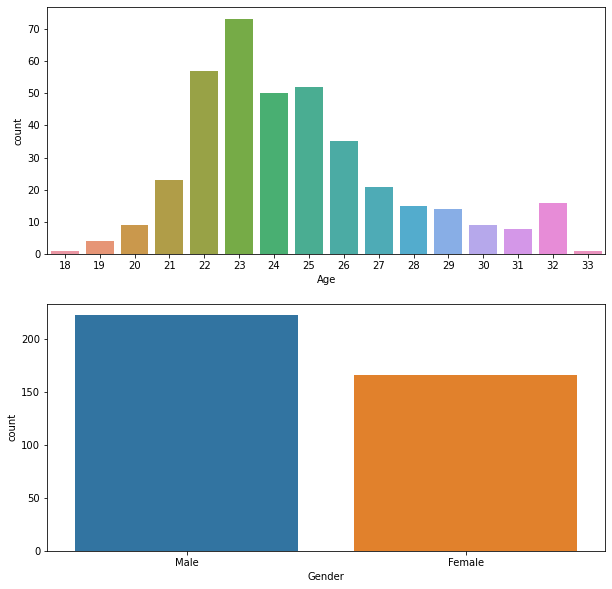

In [37]:
f, axes = plt.subplots(2, 1, figsize = (10, 10))
f = sb.countplot(x = "Age", data = foodDelivery, ax = axes[0])
f = sb.countplot(x = "Gender", data = foodDelivery, ax = axes[1], order = foodDelivery["Gender"].value_counts().index)

### Consumer Demographics - Family 
--- 
From the following plots,
- Most are single
- Most are either students or employed
- Most have no income
- Most are graduates or post-graduates
- Most have family size of 3 or 2  

We can conclude that,
- Data came from university students




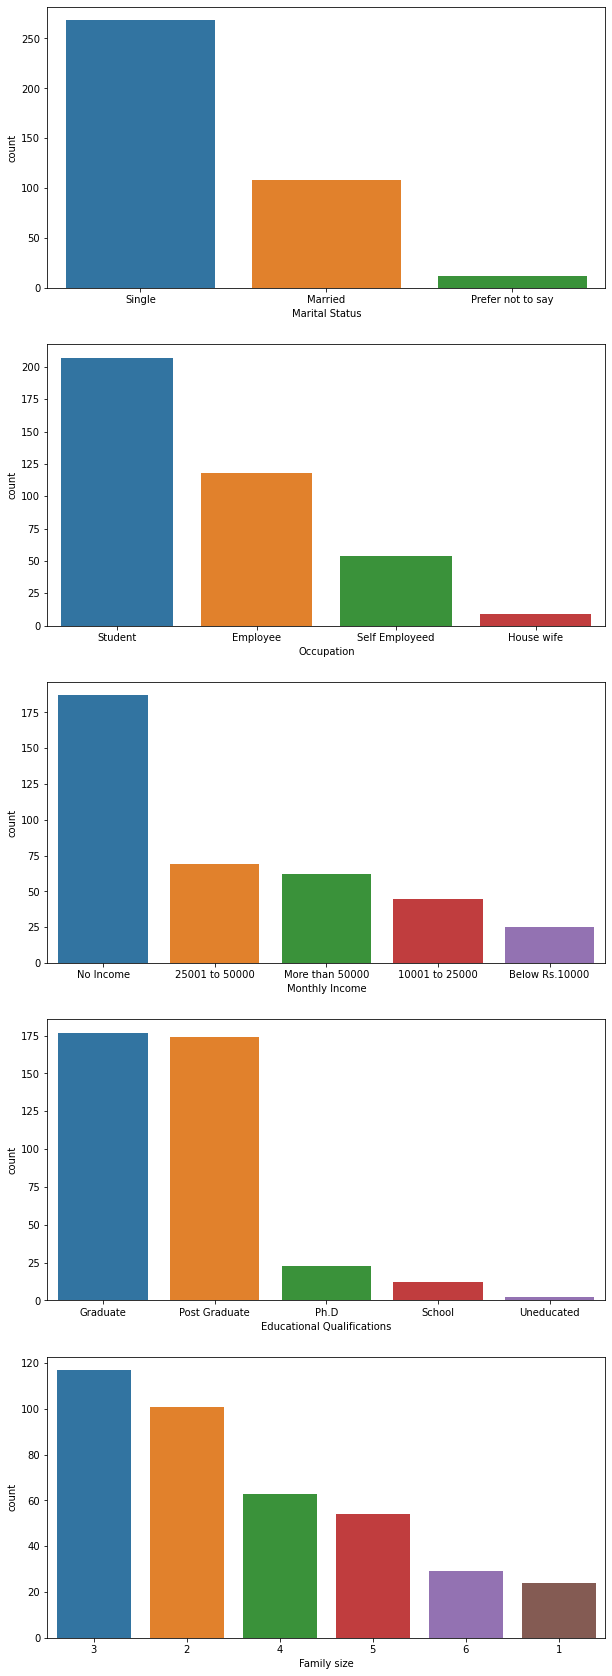

In [38]:
f, axes = plt.subplots(5, 1, figsize = (10, 30))
f = sb.countplot(x = "Marital Status", data = foodDelivery, ax = axes[0])
f = sb.countplot(x = "Occupation", data = foodDelivery, ax = axes[1])
f = sb.countplot(x = "Monthly Income", data = foodDelivery, ax = axes[2], order = foodDelivery["Monthly Income"].value_counts().index)
f = sb.countplot(x = "Educational Qualifications", data = foodDelivery, ax = axes[3], order = foodDelivery["Educational Qualifications"].value_counts().index)
f = sb.countplot(x = "Family size", data = foodDelivery, ax = axes[4], order = foodDelivery["Family size"].value_counts().index)

### Consumer Demographics - Residence
---
(Include Geospatial Analysis here)  
Since Latitude, Longitude, and Pin code only show use where the customers come from, it cannot qualitatively help us in solving the problem.

### Consumer Demographics - Delivery Preferences
---
Since Medium of order (be on all mediums), Meal-of-the-day of order (open all day), and Order Time (open all day) are variables we do not need to predict, we will be dropping these variables.
From the following plots,
- Most prefer Non-veg foods
- Maximum wait time for most is either 40 or 30 minutes

We can conclude that,
- University students mostly eat Non-veg foods
- Delivery time should not exceed 40 minutes


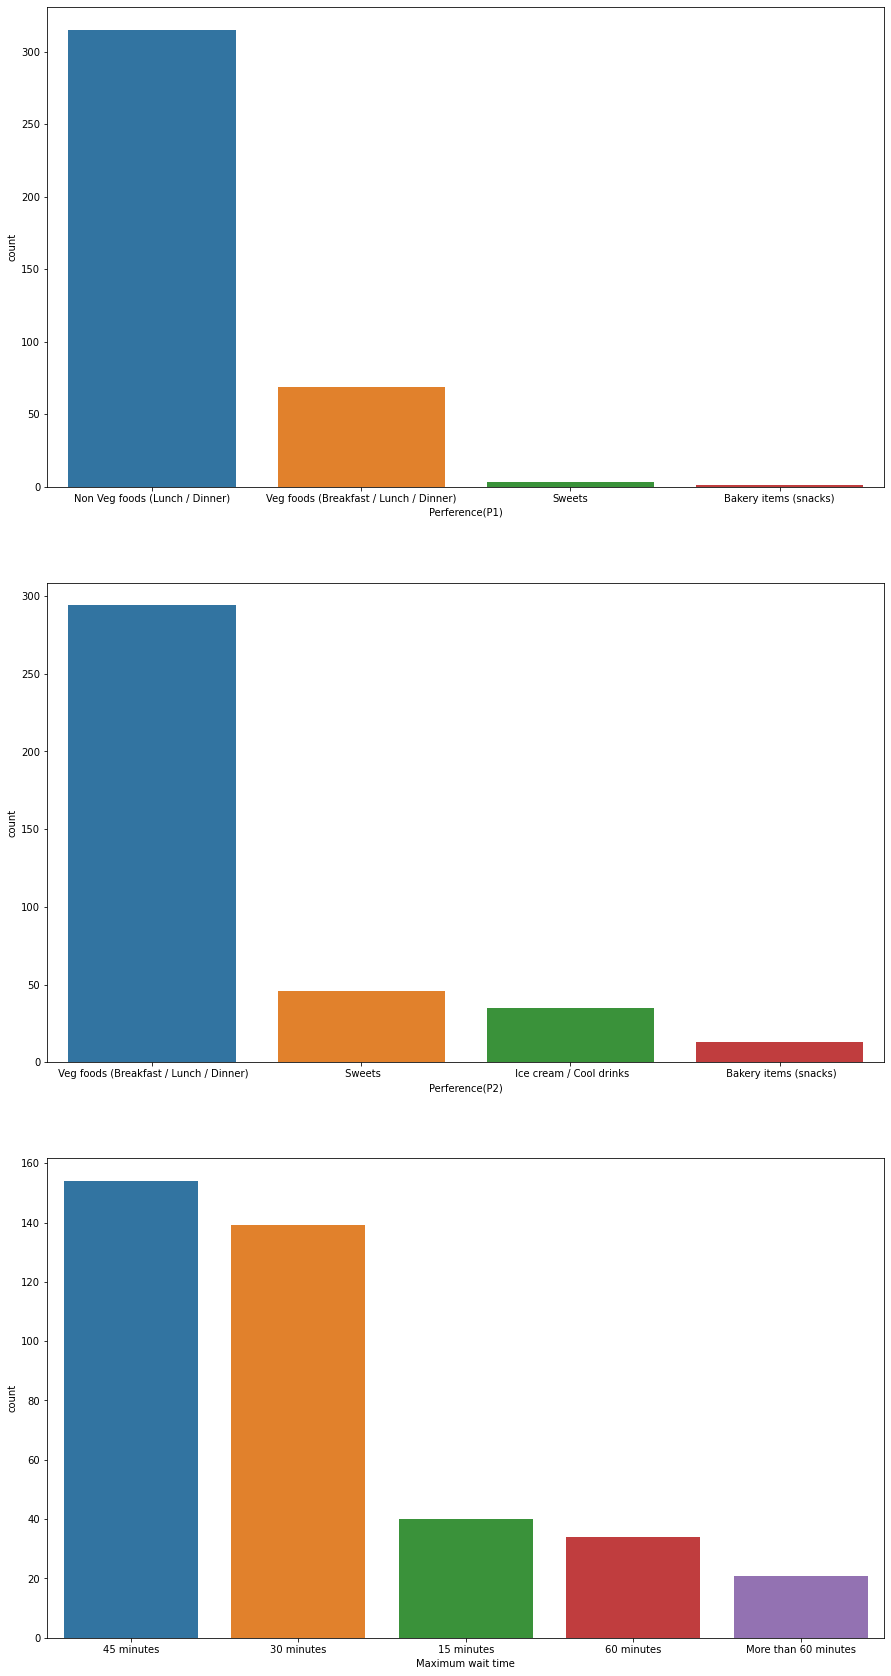

In [44]:
f, axes = plt.subplots(3, 1, figsize = (15, 30))
f = sb.countplot(x = "Perference(P1)", data = foodDelivery, ax = axes[0], order = foodDelivery["Perference(P1)"].value_counts().index)
f = sb.countplot(x = "Perference(P2)", data = foodDelivery, ax = axes[1], order = foodDelivery["Perference(P2)"].value_counts().index)
f = sb.countplot(x = "Maximum wait time", data = foodDelivery, ax = axes[2], order = foodDelivery["Maximum wait time"].value_counts().index)

### Location
---
Since we cannot control these variables in real-time, we drop these variables.

### Customer Experience: Time Factors
---
We will be performing Text Analysis on the Reviews.  
From the following plots,
- Most agree that online delivery saves time
- Most agree that there is a good delivery tracking system
- Most agree that their deliveries are late
- Most agree that their deliveries take a long time
- Most agree that there is a delay in delivery person getting assigned
- Most agree that there is a delay in delivery person picking up food
- Most agree that the lower the quantity of food they buy, the quicker their food is delivered

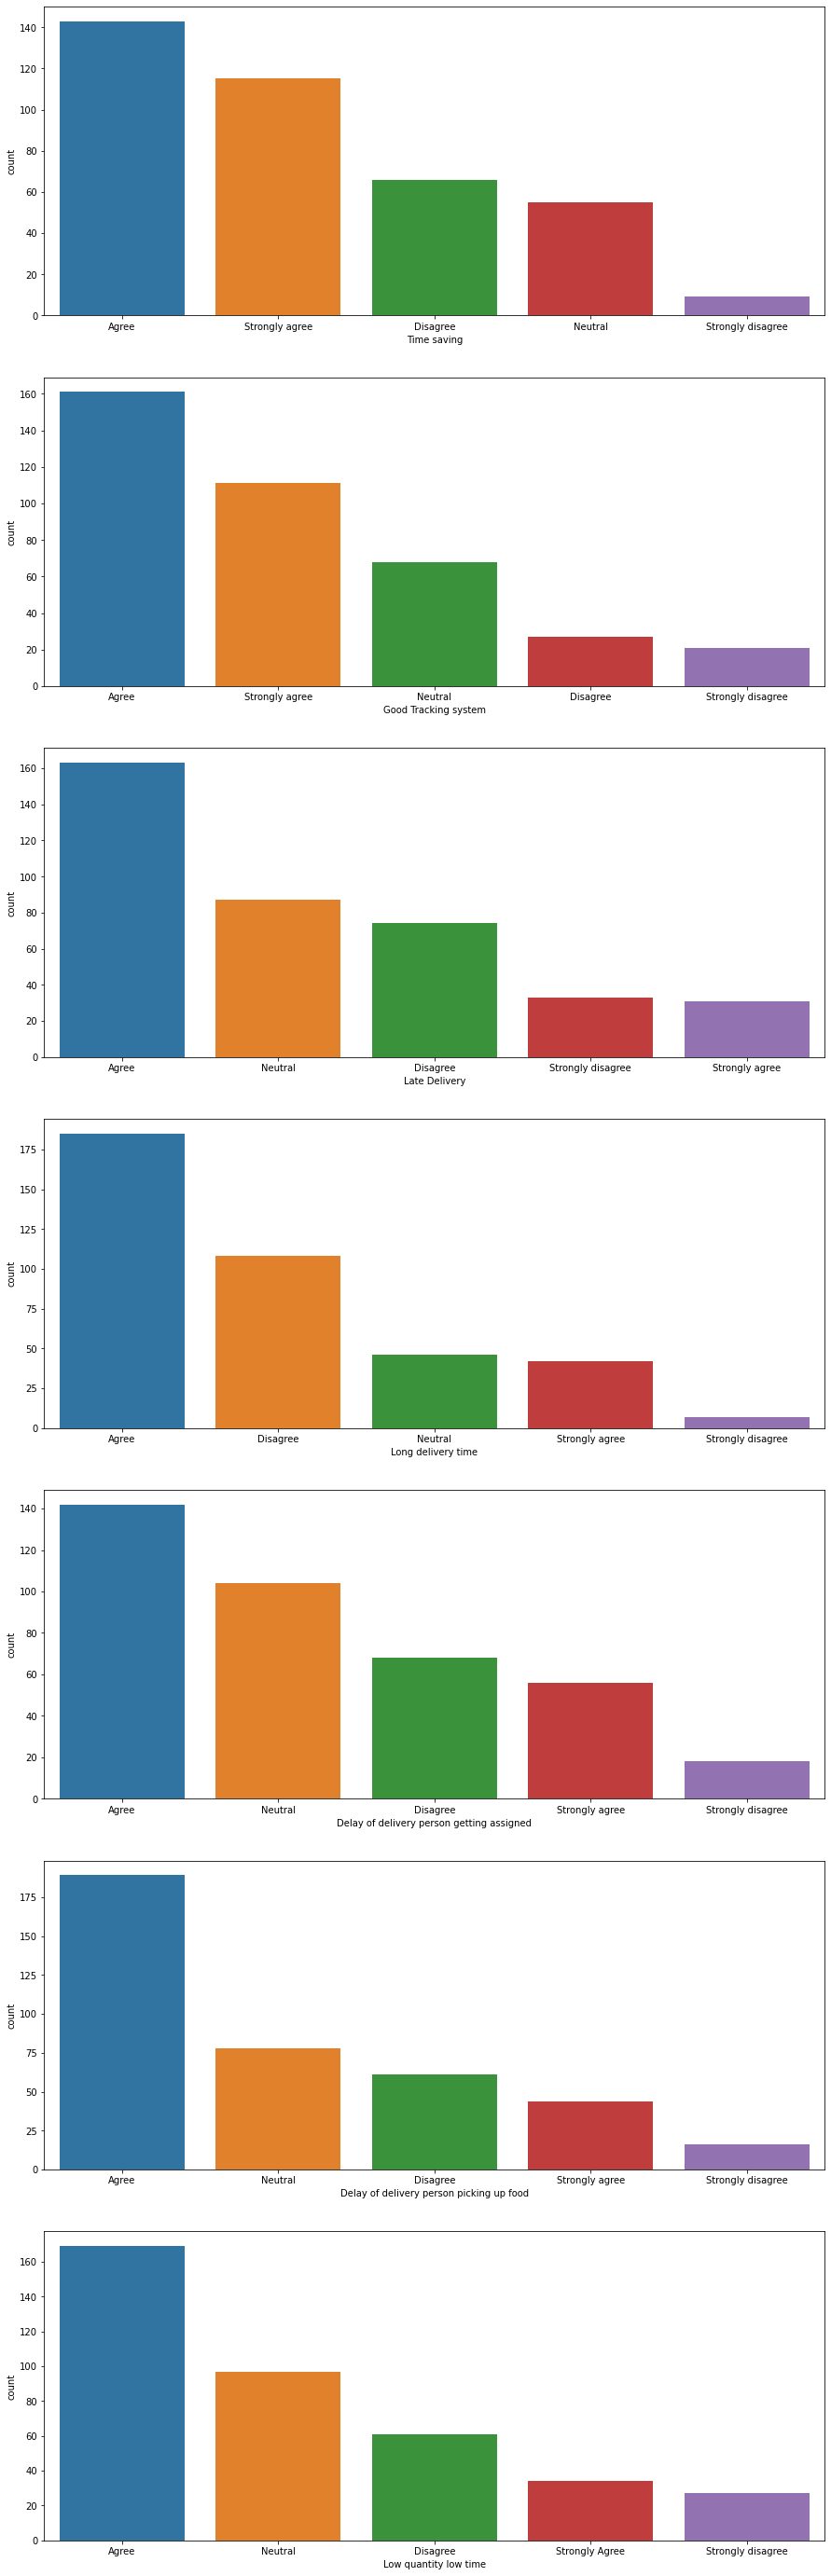

In [54]:
f, axes = plt.subplots(7, 1, figsize = (15, 50))
f = sb.countplot(x = "Time saving", data = foodDelivery, ax = axes[0], order = foodDelivery["Time saving"].value_counts().index)
f = sb.countplot(x = "Good Tracking system", data = foodDelivery, ax = axes[1], order = foodDelivery["Good Tracking system"].value_counts().index)
f = sb.countplot(x = "Late Delivery", data = foodDelivery, ax = axes[2], order = foodDelivery["Late Delivery"].value_counts().index)
f = sb.countplot(x = "Long delivery time", data = foodDelivery, ax = axes[3], order = foodDelivery["Long delivery time"].value_counts().index)
f = sb.countplot(x = "Delay of delivery person getting assigned", data = foodDelivery, ax = axes[4], order = foodDelivery["Delay of delivery person getting assigned"].value_counts().index)
f = sb.countplot(x = "Delay of delivery person picking up food", data = foodDelivery, ax = axes[5], order = foodDelivery["Delay of delivery person picking up food"].value_counts().index)
f = sb.countplot(x = "Low quantity low time", data = foodDelivery, ax = axes[6], order = foodDelivery["Low quantity low time"].value_counts().index)


### Customer Experience: Food Factors
---
We will be performing Text Analysis on the Reviews.  
From the following plots,
- Most agree that there are many restaurant choices
- Most agree that food quality is good
- Equal number of people agree and disagree they are concerned with health when ordering food online
- Equal number of people agree and disagree the restaurant has poor hygiene
- Most people disagree there is unavailability when ordering food
- Most disagree that online delivered food is unaffordable

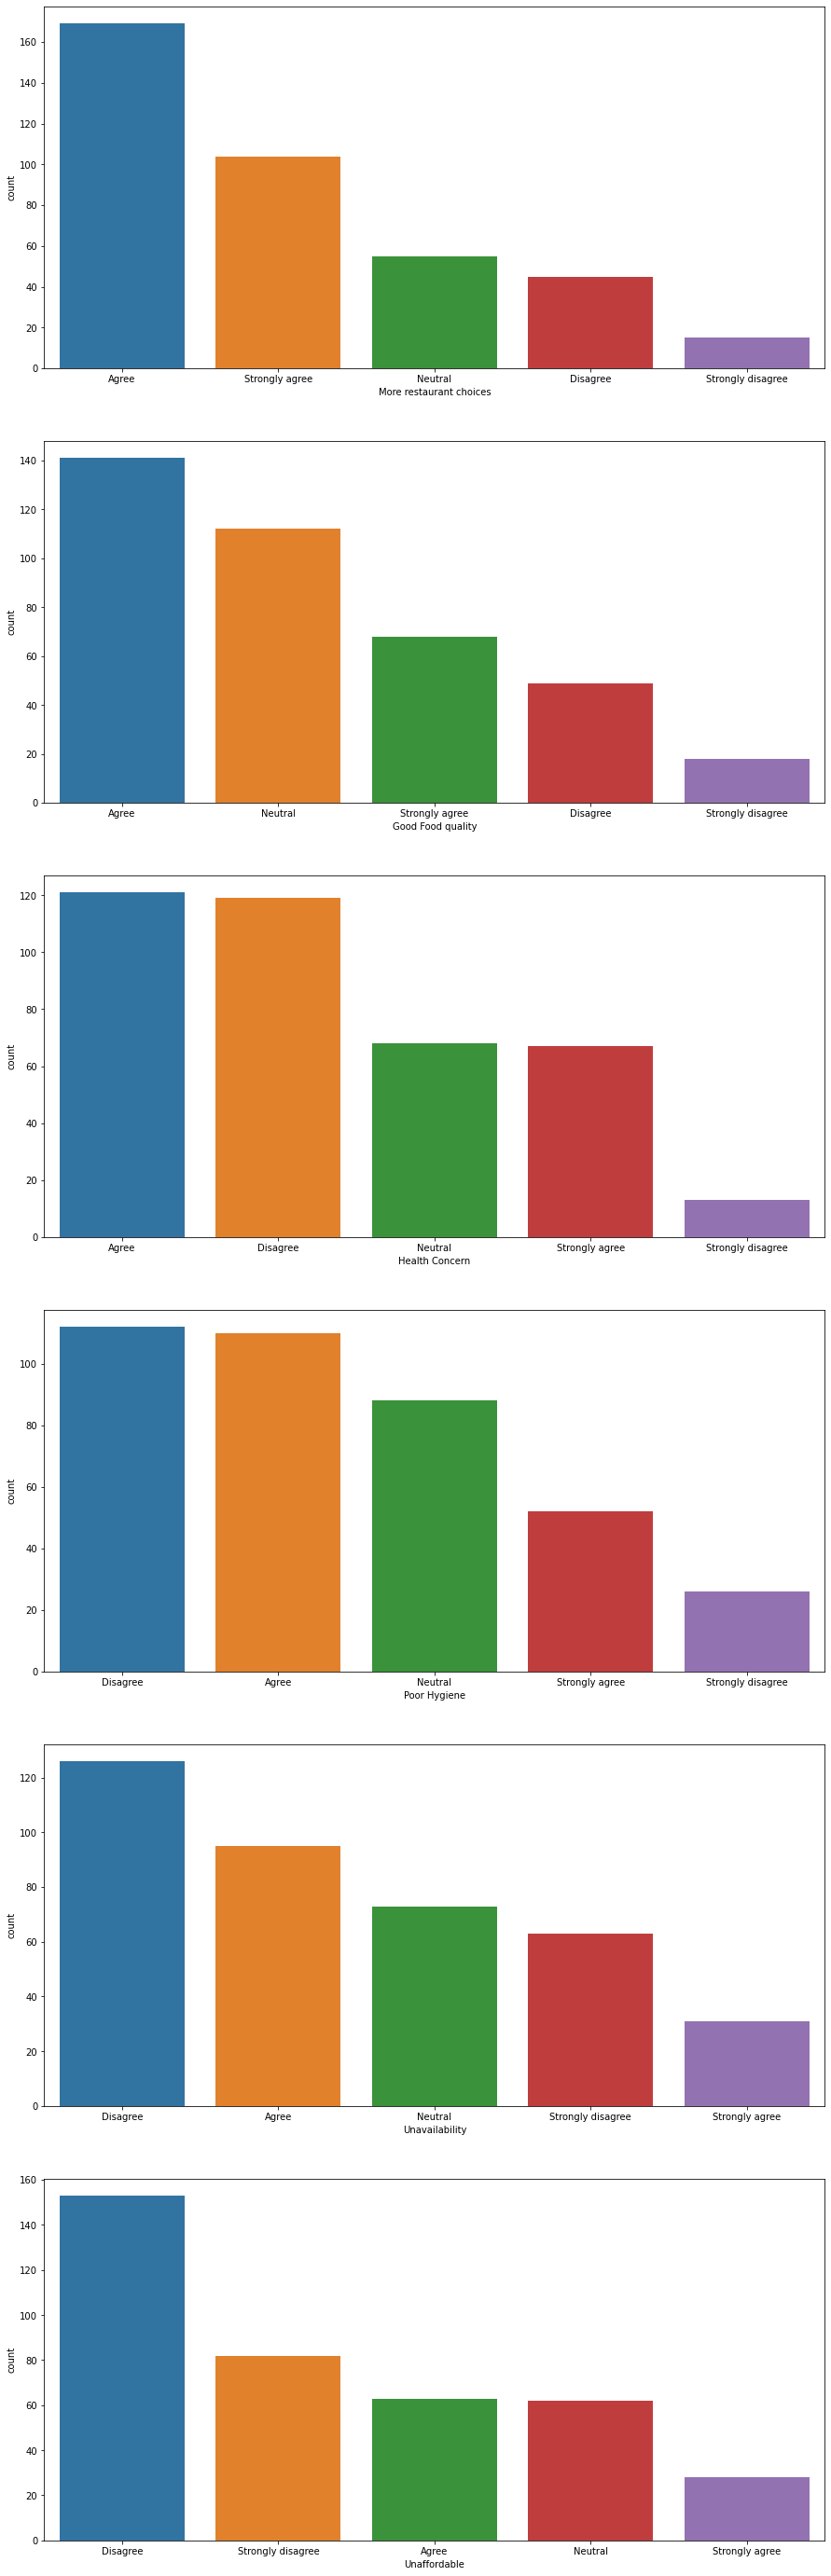

In [60]:
f, axes = plt.subplots(6, 1, figsize = (15, 50))
f = sb.countplot(x = "More restaurant choices", data = foodDelivery, ax = axes[0], order = foodDelivery["More restaurant choices"].value_counts().index)
f = sb.countplot(x = "Good Food quality", data = foodDelivery, ax = axes[1], order = foodDelivery["Good Food quality"].value_counts().index)
f = sb.countplot(x = "Health Concern", data = foodDelivery, ax = axes[2], order = foodDelivery["Health Concern"].value_counts().index)
f = sb.countplot(x = "Poor Hygiene", data = foodDelivery, ax = axes[3], order = foodDelivery["Poor Hygiene"].value_counts().index)
f = sb.countplot(x = "Unavailability", data = foodDelivery, ax = axes[4], order = foodDelivery["Unavailability"].value_counts().index)
f = sb.countplot(x = "Unaffordable", data = foodDelivery, ax = axes[5], order = foodDelivery["Unaffordable"].value_counts().index)



### Customer Experience: Others
---
We will be performing Text Analysis on the Reviews.  
From the following plots,
- Most agree that food deliveries provide ease and convenient
- Most agree payment options are easy 
- Most agree there are more offers and discounts
- Almost an equal of people are cooking at home and ordering food online
- Most disagree they had bad past experiences with ordering food online
- Most agree the delivery person was good at delivering food
- Most disagree they had the wrong order delivered to them
- Most disagree they had a missing item in their orders
- Most disagree they place their orders by mistake
- Most said delivery time influences their order 
- Most said rating of restaurant influences their order
- Most people are satisfied with their food order  

We conclude that,
- ???


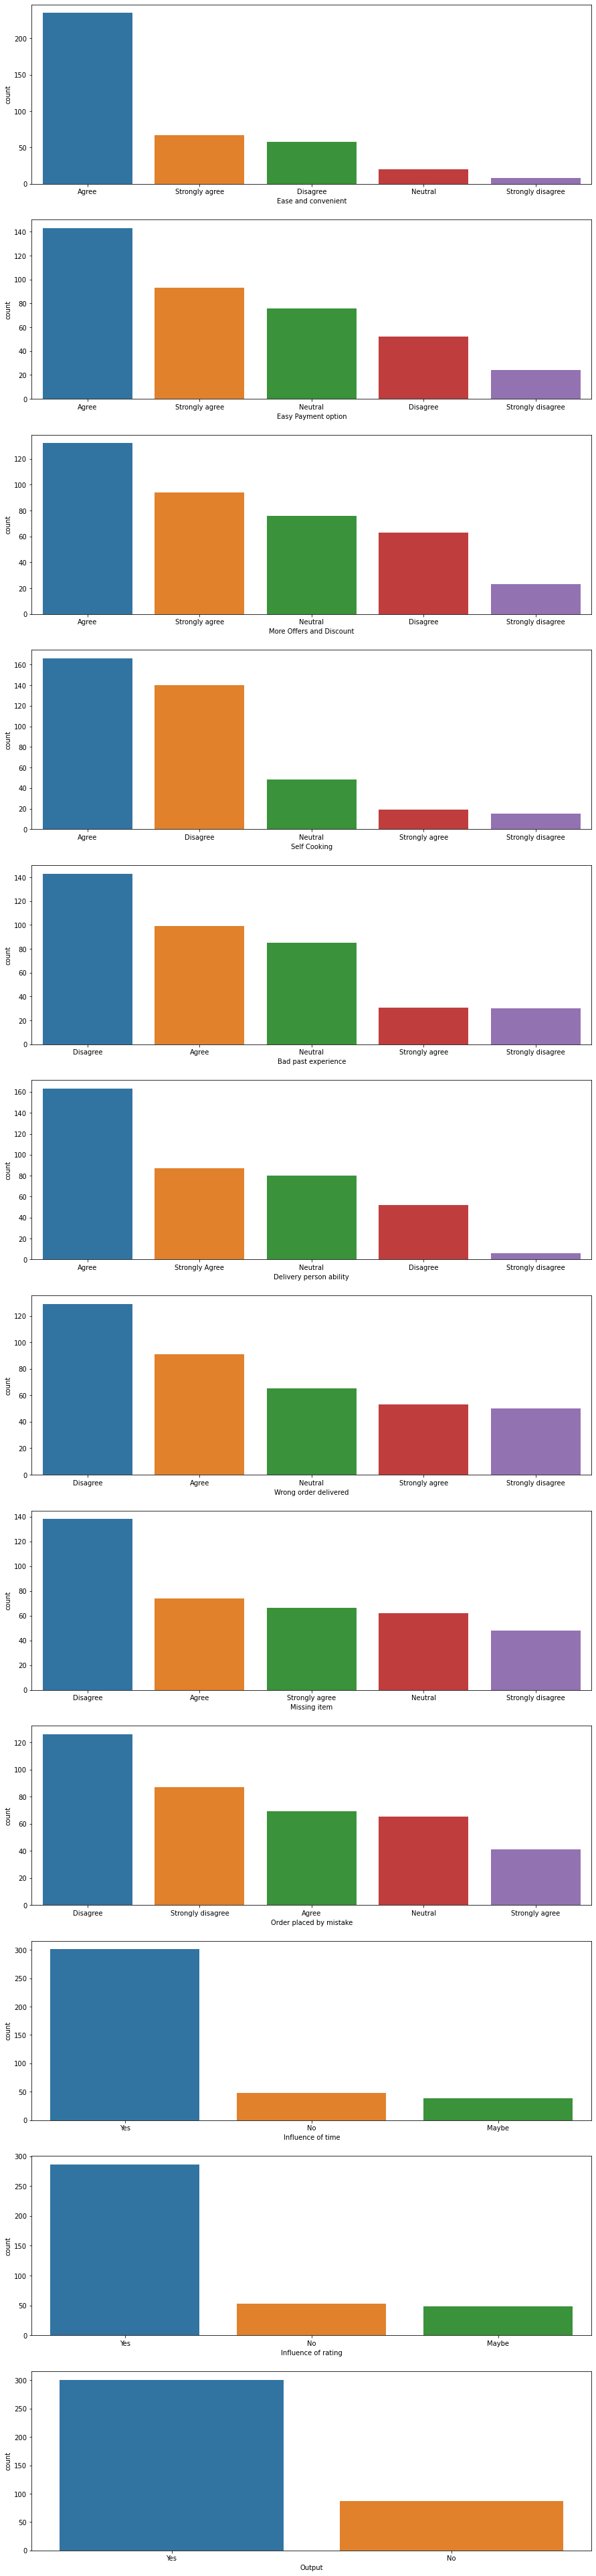

In [65]:
f, axes = plt.subplots(12, 1, figsize = (15, 70))
f = sb.countplot(x = "Ease and convenient", data = foodDelivery, ax = axes[0], order = foodDelivery["Ease and convenient"].value_counts().index)
f = sb.countplot(x = "Easy Payment option", data = foodDelivery, ax = axes[1], order = foodDelivery["Easy Payment option"].value_counts().index)
f = sb.countplot(x = "More Offers and Discount", data = foodDelivery, ax = axes[2], order = foodDelivery["More Offers and Discount"].value_counts().index)
f = sb.countplot(x = "Self Cooking", data = foodDelivery, ax = axes[3], order = foodDelivery["Self Cooking"].value_counts().index)
f = sb.countplot(x = "Bad past experience", data = foodDelivery, ax = axes[4], order = foodDelivery["Bad past experience"].value_counts().index)
f = sb.countplot(x = "Delivery person ability", data = foodDelivery, ax = axes[5], order = foodDelivery["Delivery person ability"].value_counts().index)
f = sb.countplot(x = "Wrong order delivered", data = foodDelivery, ax = axes[6], order = foodDelivery["Wrong order delivered"].value_counts().index)
f = sb.countplot(x = "Missing item", data = foodDelivery, ax = axes[7], order = foodDelivery["Missing item"].value_counts().index)
f = sb.countplot(x = "Order placed by mistake", data = foodDelivery, ax = axes[8], order = foodDelivery["Order placed by mistake"].value_counts().index)
f = sb.countplot(x = "Influence of time", data = foodDelivery, ax = axes[9], order = foodDelivery["Influence of time"].value_counts().index)
f = sb.countplot(x = "Influence of rating", data = foodDelivery, ax = axes[10], order = foodDelivery["Influence of rating"].value_counts().index)
f = sb.countplot(x = "Output", data = foodDelivery, ax = axes[11], order = foodDelivery["Output"].value_counts().index)

### Customer's Demands Importance
---
We will be performing Text Analysis on the Reviews.  
From the following plots,
- Most think less delivery time is important for satisfaction
- Most think higher quality of delivery is important for satisfaction
- Most think number of calls is important for satisfaction
- Most think politeness of delivery guy is important for satisfaction
- Most think freshness of food is very important for satisfaction
- Most think temperature of food is important for satisfaction
- Most think good taste of food is very important for satisfaction
- Most think good quantity of food is very important for satisfaction


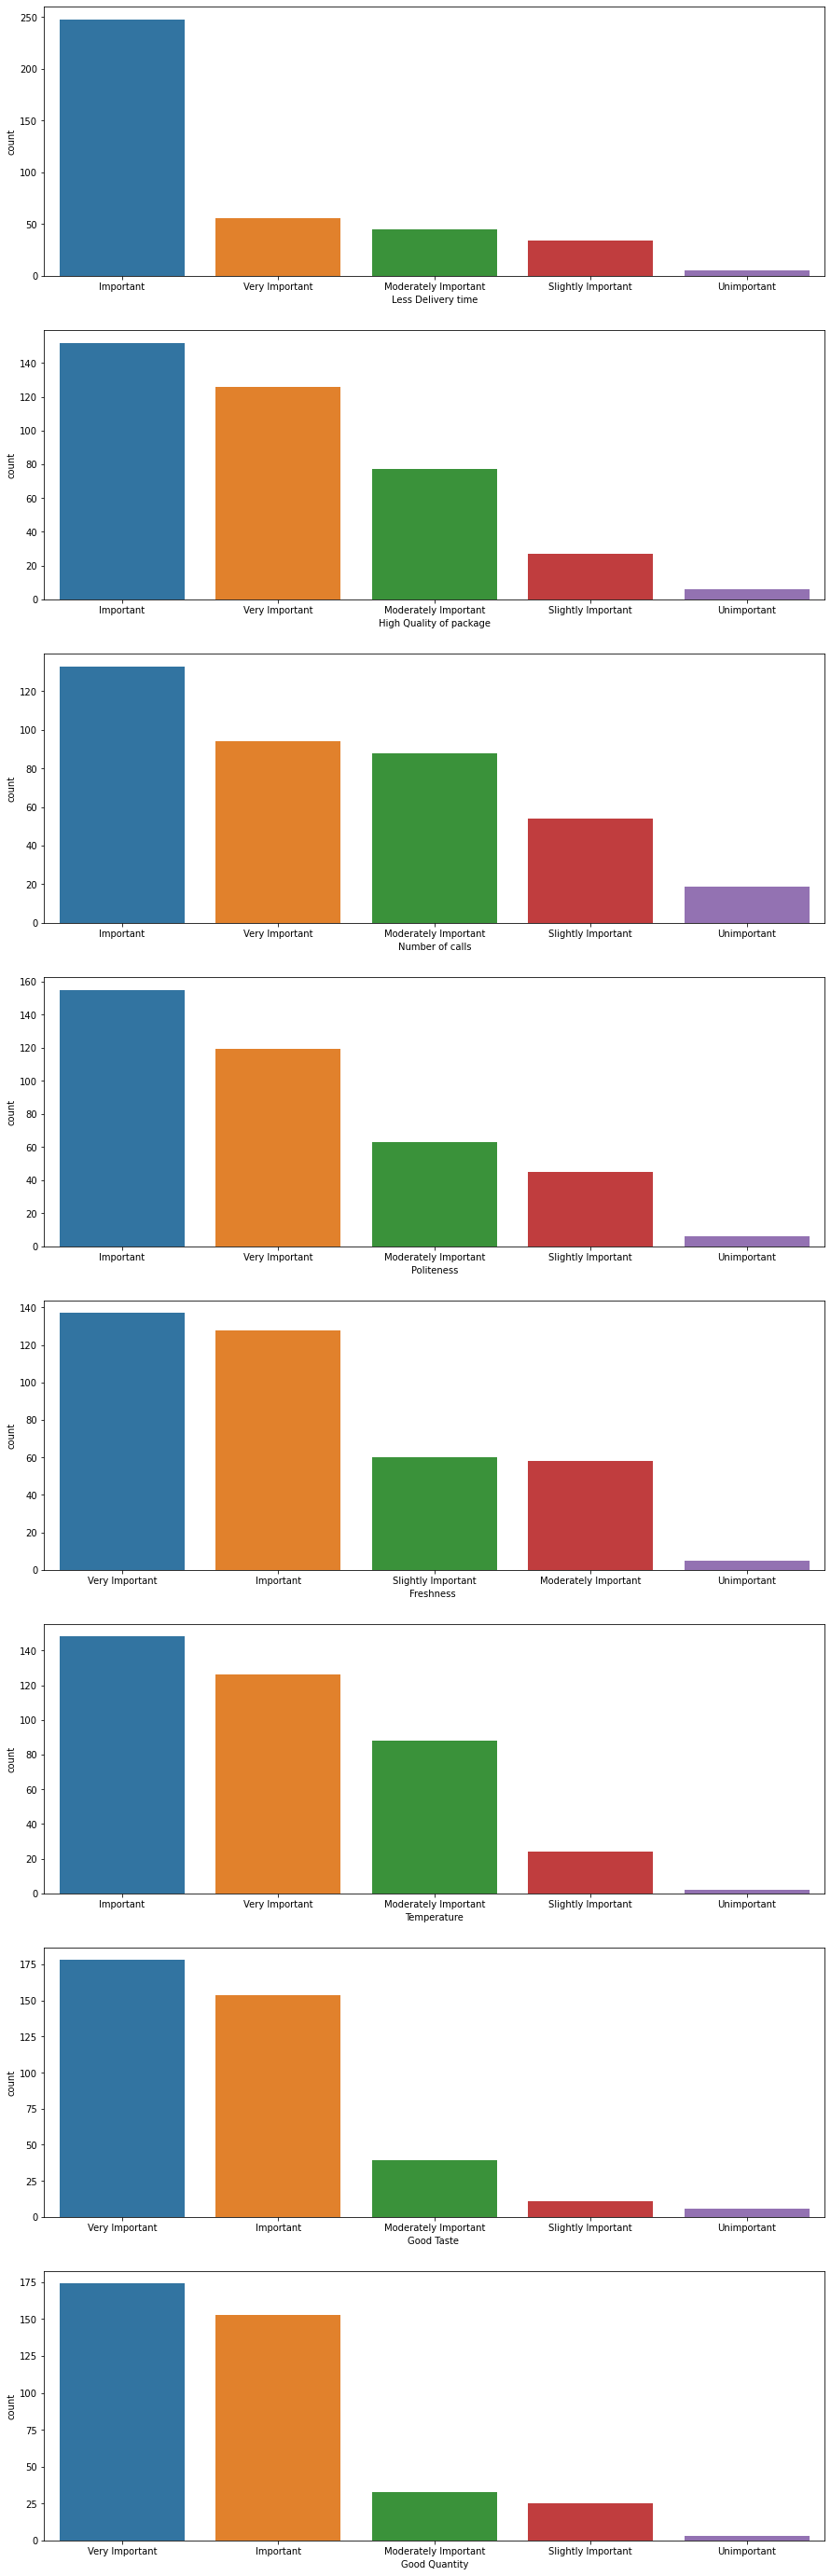

In [61]:
f, axes = plt.subplots(8, 1, figsize = (15, 50))
f = sb.countplot(x = "Less Delivery time", data = foodDelivery, ax = axes[0], order = foodDelivery["Less Delivery time"].value_counts().index)
f = sb.countplot(x = "High Quality of package", data = foodDelivery, ax = axes[1], order = foodDelivery["High Quality of package"].value_counts().index)
f = sb.countplot(x = "Number of calls", data = foodDelivery, ax = axes[2], order = foodDelivery["Number of calls"].value_counts().index)
f = sb.countplot(x = "Politeness", data = foodDelivery, ax = axes[3], order = foodDelivery["Politeness"].value_counts().index)
f = sb.countplot(x = "Freshness ", data = foodDelivery, ax = axes[4], order = foodDelivery["Freshness "].value_counts().index)
f = sb.countplot(x = "Temperature", data = foodDelivery, ax = axes[5], order = foodDelivery["Temperature"].value_counts().index)
f = sb.countplot(x = "Good Taste ", data = foodDelivery, ax = axes[6], order = foodDelivery["Good Taste "].value_counts().index)
f = sb.countplot(x = "Good Quantity", data = foodDelivery, ax = axes[7], order = foodDelivery["Good Quantity"].value_counts().index)

# Multivariate Analysis?
---

# Data Cleaning
---

## Missing Values
---
Here, we check for NaN values in our dataset

In [66]:
foodDelivery.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua